### Predicting confirmed covid-19 cases 30 days later by applying the Prophet Model with confirmed covid-19 cases published by countries


In [81]:
from prophet import Prophet
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Data Prep For the Prophet Model by Facebook

In [2]:
dataset=pd.read_csv("/Users/altayavci/Documents/Data Science/UdemyProjects/Covid19Cases/Data/covid_19_clean_complete.csv")

In [3]:
dataset.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
dataset["Date"]=pd.to_datetime(dataset["Date"])

In [5]:
dataset.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [6]:
dataset.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [7]:
dataset["Date"].nunique() 
#we have 188 unique dates (unique means that not repeated, and for the time series analysis , unique index values is neeeded

188

In [8]:
total=dataset.groupby(["Date"])["Confirmed","Deaths","Recovered","Active"].sum().reset_index()
#we grouped the dataset to Date

In [9]:
total

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


## Build the Prophet Model

In [10]:
datasetProphet=total.rename(columns={"Date":"ds","Confirmed":"y"})

#for the applying the model, ds represents date, and y represents that wanted predicting value. The reason that did the changings, Prophet model wants to see ds and y 

In [11]:
datasetProphet.tail()

,ds,y,Deaths,Recovered,Active
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711
187,2020-07-27,16480485,654036,9468087,6358362


In [12]:
prop=Prophet()

In [13]:
model=prop.fit(datasetProphet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future_ds=model.make_future_dataframe(periods=30,freq='D')

In [15]:
future_ds.tail()

,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


In [16]:
future_ds.shape

(218, 1)

The reason that we sued make_future_dataframe,added 30 days to Date  for the predicting. Dataset.shape=187, future_ds.shape=218 so there is a 30 days difference between each other. Basically , yeah it worked. periods mean adding days, freq="D" means dailybase

## Plot the Model

In [17]:
prediction=model.predict(future_ds)

#to see that trend 

In [18]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-5.689939e+03,-1.322242e+05,8.941845e+04,-5.689939e+03,-5.689939e+03,-11006.396274,-11006.396274,-11006.396274,-11006.396274,-11006.396274,-11006.396274,0.0,0.0,0.0,-1.669634e+04
1,2020-01-23,-3.228801e+03,-1.136208e+05,1.021447e+05,-3.228801e+03,-3.228801e+03,-1078.792675,-1078.792675,-1078.792675,-1078.792675,-1078.792675,-1078.792675,0.0,0.0,0.0,-4.307594e+03
2,2020-01-24,-7.676632e+02,-9.186736e+04,1.195631e+05,-7.676632e+02,-7.676632e+02,10108.672513,10108.672513,10108.672513,10108.672513,10108.672513,10108.672513,0.0,0.0,0.0,9.341009e+03
3,2020-01-25,1.693475e+03,-8.984725e+04,1.145630e+05,1.693475e+03,1.693475e+03,13737.819507,13737.819507,13737.819507,13737.819507,13737.819507,13737.819507,0.0,0.0,0.0,1.543129e+04
4,2020-01-26,4.154613e+03,-8.812298e+04,1.168253e+05,4.154613e+03,4.154613e+03,7244.779377,7244.779377,7244.779377,7244.779377,7244.779377,7244.779377,0.0,0.0,0.0,1.139939e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144317e+07,2.109476e+07,2.181949e+07,2.109377e+07,2.179607e+07,13737.819507,13737.819507,13737.819507,13737.819507,13737.819507,13737.819507,0.0,0.0,0.0,2.145691e+07
214,2020-08-23,2.164732e+07,2.127075e+07,2.202737e+07,2.126789e+07,2.202711e+07,7244.779377,7244.779377,7244.779377,7244.779377,7244.779377,7244.779377,0.0,0.0,0.0,2.165457e+07
215,2020-08-24,2.185148e+07,2.145404e+07,2.225261e+07,2.144988e+07,2.225050e+07,-2183.081986,-2183.081986,-2183.081986,-2183.081986,-2183.081986,-2183.081986,0.0,0.0,0.0,2.184930e+07
216,2020-08-25,2.205563e+07,2.162332e+07,2.245891e+07,2.163453e+07,2.248166e+07,-16823.000462,-16823.000462,-16823.000462,-16823.000462,-16823.000462,-16823.000462,0.0,0.0,0.0,2.203881e+07


In [19]:
prediction[["ds","yhat","yhat_lower","yhat_upper"]].head()

#shows the trends over here

#yhat means that our predictions !!! 

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-16696.335573,-132224.233881,89418.452739
1,2020-01-23,-4307.593918,-113620.795934,102144.727853
2,2020-01-24,9341.009326,-91867.363306,119563.082631
3,2020-01-25,15431.294376,-89847.247847,114562.960187
4,2020-01-26,11399.392302,-88122.984008,116825.321010


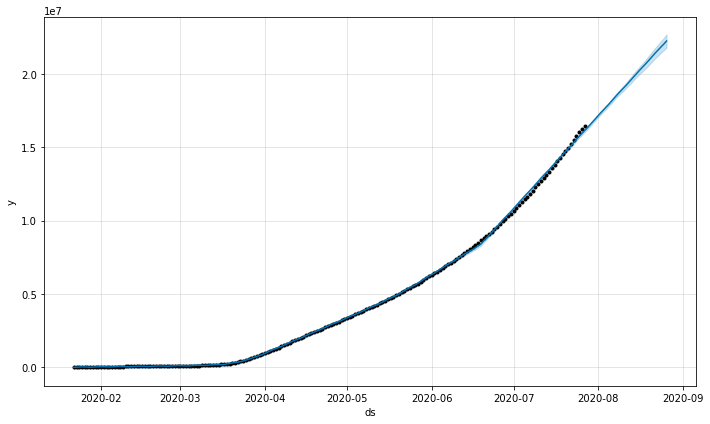

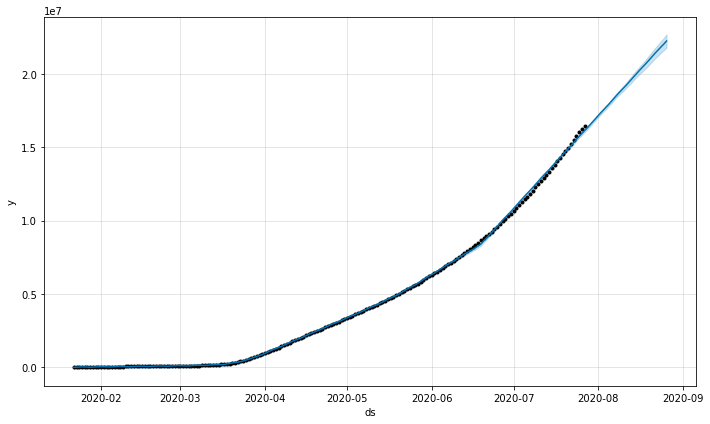

In [20]:
model.plot(prediction)

The line formed by the black dots represents the data in our dataset. the blue line represents future_ds forecasts. Light blue areas show trends.

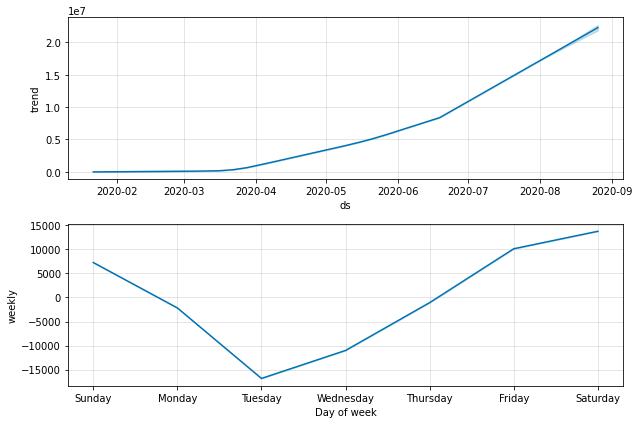

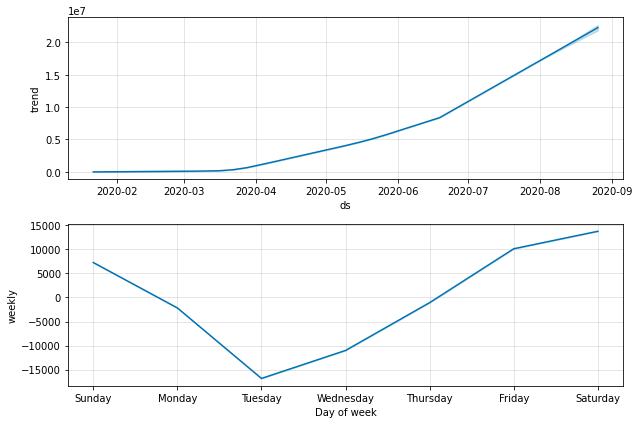

In [21]:
model.plot_components(prediction)

Trendline and weekly plotting respect to our prediction dataset

In [22]:
from prophet.plot import add_changepoints_to_plot

[[<matplotlib.lines.Line2D at 0x7f877c209220>],

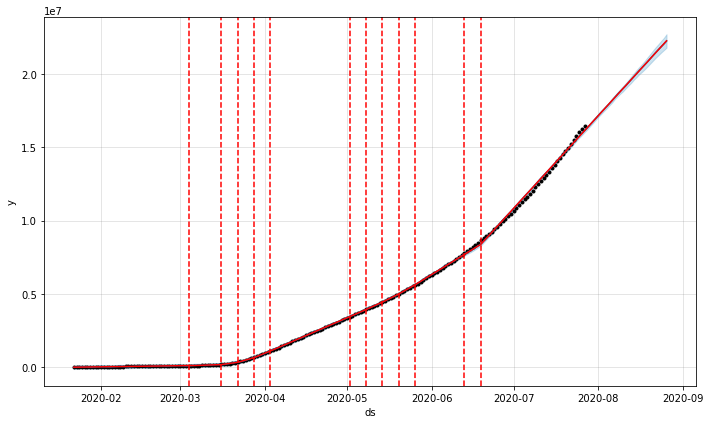

In [23]:
fig=model.plot(prediction)

add_changepoints_to_plot(fig.gca(),model,prediction)

Graphical modeling showing the cutoff points(trend changes) in the plot created by our model

## Cross Validation

In [24]:
from prophet.diagnostics import cross_validation

In [28]:
datasetCrossValidation=cross_validation(model,horizon="30 days",period="15 days",initial="90 days")

#period has to be half of the horizon value also initial has to be 3 times over the horizon value.

INFO:prophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [33]:
datasetCrossValidation.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.195658e+06,3.206106e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279257e+06,3.291908e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361615e+06,3.377633e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.439108e+06,3.460516e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.513993e+06,3.545100e+06,3515244,2020-04-28


Up there on the plotting, there is red dashed lines that which are cutoff points. Cross validation works on the dataset between the two cutoff points.  

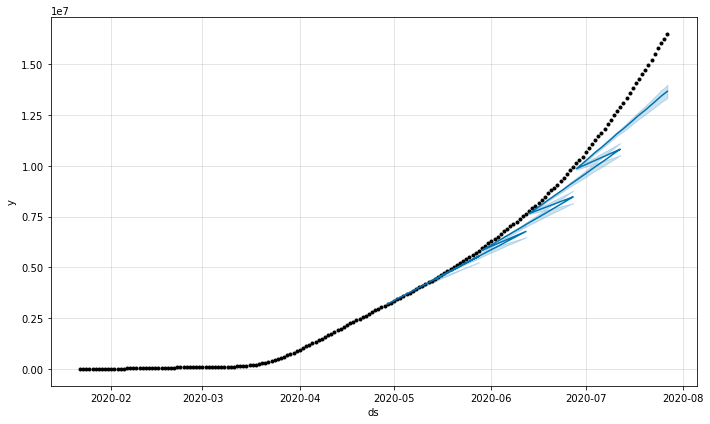

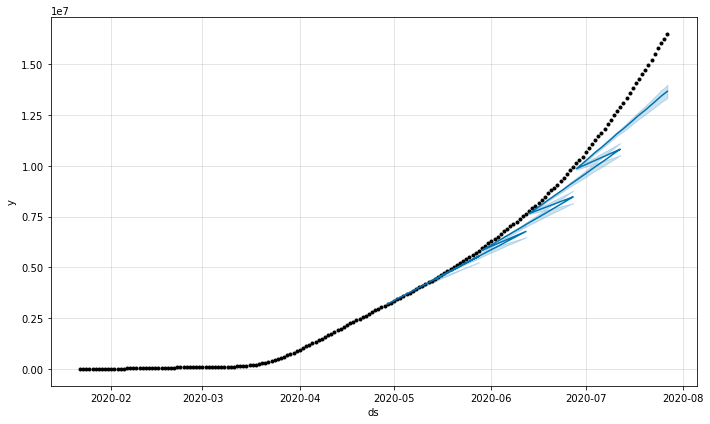

In [35]:
model.plot(datasetCrossValidation)

The reason that why blue lines didnt fit on the predicting values, cv worked at the diffrent trend lines among the two cutoff points

In [73]:
datasetCrossValidation[datasetCrossValidation["ds"]=="2020-04-29"]["yhat"]
#cv predicted value

0    3.201064e+06
Name: yhat, dtype: float64

In [74]:
datasetCrossValidation[datasetCrossValidation["ds"]=="2020-04-29"]["y"]
#actual value

0    3185195
Name: y, dtype: int64

In [75]:
prediction[prediction["ds"]=="2020-04-29"]["yhat"]
#model predicted value

98    3.187270e+06
Name: yhat, dtype: float64

## Metrics

In [82]:
from prophet.diagnostics import performance_metrics

In [83]:
datasetPerformance=performance_metrics(datasetCrossValidation)
datasetPerformance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.730259e+10,165234.962846,129387.188221,0.016893,0.017659,0.017077,0.000000
1,4 days,3.780978e+10,194447.371596,151585.025321,0.019356,0.022478,0.019602,0.000000
2,5 days,5.183286e+10,227668.307342,175424.594972,0.021807,0.025770,0.022127,0.066667
3,6 days,6.954045e+10,263705.233164,202418.856704,0.024586,0.026763,0.024998,0.133333
4,7 days,9.033300e+10,300554.486633,232779.260194,0.027869,0.031321,0.028395,0.200000


In [84]:
from prophet.plot import plot_cross_validation_metric

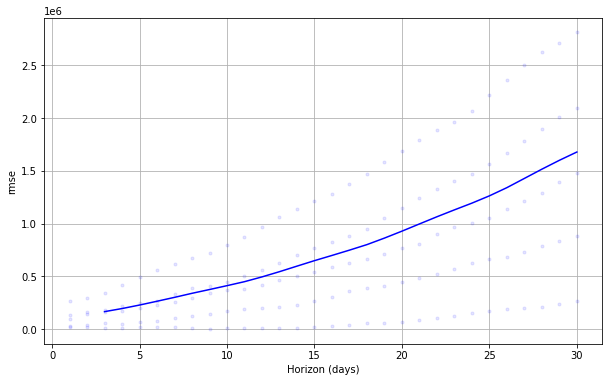

In [94]:
rmsePlot=plot_cross_validation_metric(datasetCrossValidation,metric='rmse')

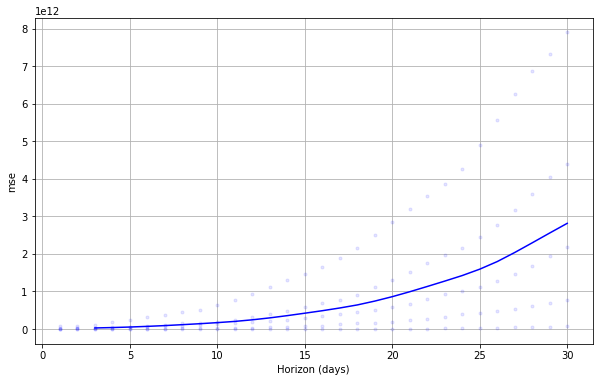

In [95]:
msePlot=plot_cross_validation_metric(datasetCrossValidation,metric='mse')

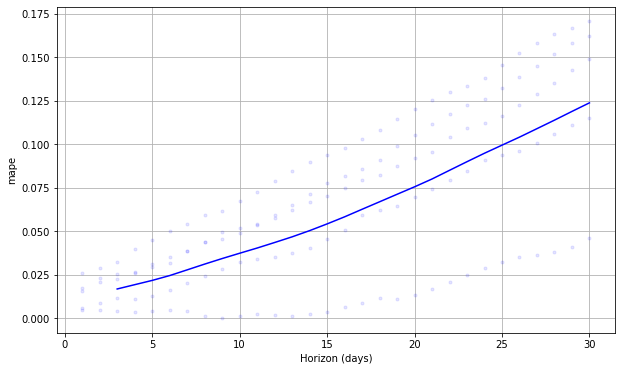

In [96]:
mapePlot=plot_cross_validation_metric(datasetCrossValidation,metric='mape')

Blue line represents the average trend line of the white-point lines 